# Vamshikrishna_Narmula_DSFT8_MINIPROJECT-1 (REGRESSION)

In [1]:
#importing the required libraries
import numpy as np    # To operate mathematical
import pandas as pd   # To operate the dataframes
import matplotlib.pyplot as plt   # To visualize
import seaborn as sb    # TO visualize

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#structure
df.shape

(14204, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
#copying the data to another dataframe
df2 = df.copy()

In [8]:
#checking for structure
df2.shape

(14204, 12)

# process for the imputation of missing values using Linear Regression model.

In [9]:
#dropping the null values from the copied data
df2.dropna(subset='Item_Outlet_Sales',inplace=True)

In [10]:
#structure checking after dropping null values
df2.shape

(8523, 12)

In [11]:
#checking for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [12]:
#copying the null values free data 
df2_1 = df2.copy()
df2_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
#checking for the shape
df2_1.shape

(8523, 12)

In [14]:
#dataset with null values in the dependent column
df2_n  = df.Item_Outlet_Sales.isnull()
df2_n = df[df2_n]
df2_n

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [15]:
#checking for the info of dataset with null values
df2_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Outlet_Sales          0 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 577.0+ KB


In [16]:
#copying the dataset of null values to another dataset to keep the original dataset 
df2_n_1 = df2_n.copy()
df2_n_1.shape

(5681, 12)

## Data Preprocessing for predicting the null values

In [17]:
#non numeric columns in a list
non_numeric_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [18]:
#converting non numeric columns to category
for i in non_numeric_cols:
    df2_1[i] = df2_1[i].astype('category')

In [19]:
#checking for info after converting to category
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [20]:
#dataset with null values having non numeric columns converted to category
for j in non_numeric_cols:
    df2_n_1[i] = df2_n_1[i].astype('category')

In [21]:
#checking for info
df2_n_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            5681 non-null   object  
 1   Item_Weight                5681 non-null   float64 
 2   Item_Fat_Content           5681 non-null   object  
 3   Item_Visibility            5681 non-null   float64 
 4   Item_Type                  5681 non-null   object  
 5   Item_MRP                   5681 non-null   float64 
 6   Outlet_Identifier          5681 non-null   object  
 7   Outlet_Establishment_Year  5681 non-null   int64   
 8   Outlet_Size                5681 non-null   object  
 9   Outlet_Location_Type       5681 non-null   object  
 10  Outlet_Type                5681 non-null   category
 11  Item_Outlet_Sales          0 non-null      float64 
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 538.3+ KB


In [22]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [23]:
#category columns in a list
category_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [24]:
#using label encoder converting category columns to numeric
label_encoder = LabelEncoder()

for v in category_cols:
    df2_1[v] = label_encoder.fit_transform(df2_1[v])

In [25]:
#using label encoder for dataset of null values converting category columns to numeric
for a in category_cols:
    df2_n_1[a] = label_encoder.fit_transform(df2_n_1[a])

In [26]:
#dropping the unnecessary column and dependent column
X = df2_1.drop(columns = ['Item_Identifier','Item_Outlet_Sales'],axis=1)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.200,1,0.074402,6,182.0950,0,1998,1,2,0
4,8.930,0,0.064299,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [27]:
#dropping the unnecessary column and dependent column from dataset with null values
X_n = df2_n_1.drop(columns = ['Item_Identifier','Item_Outlet_Sales'],axis=1)
X_n 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
8524,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
8525,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
8526,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
8527,13.600,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
14199,10.500,1,0.013496,13,141.3154,8,1997,2,0,1
14200,7.600,1,0.142991,15,169.1448,3,2009,1,2,2
14201,10.000,0,0.073529,8,118.7440,7,2002,2,1,1
14202,15.300,1,0.064709,3,214.6218,2,2007,2,1,1


In [28]:
#dependent column
Y = df2_1[['Item_Outlet_Sales']]
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [29]:
#dependent column for null values dataset
Y_n = df2_n_1[['Item_Outlet_Sales']]
Y_n

,Item_Outlet_Sales
8523,NaN
8524,NaN
8525,NaN
8526,NaN
8527,NaN
...,...
14199,NaN
14200,NaN
14201,NaN
14202,NaN


In [30]:
#importing the library for scaling the data
from sklearn.preprocessing import StandardScaler

In [31]:
#perform scaling using standardisation for null values free dataset without dependent column
scaler = StandardScaler()
numerics = ['int16','int32','int64','float16','float32','float64']
df2_new = X.select_dtypes(include=numerics)
df2_scaled = pd.DataFrame(scaler.fit_transform(df2_new.to_numpy()),columns=df2_new.columns)
df2_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.312032,-1.293934,-2.055561,1.091569,-0.252658
...,...,...,...,...,...,...,...,...,...,...
8518,-1.293395,-0.738147,-0.280883,1.371418,1.180783,-1.312032,-1.293934,-2.055561,1.091569,-0.252658
8519,-0.967282,1.354743,-0.481895,-1.716656,-0.527301,0.802852,0.497909,0.905322,-0.138882,-0.252658
8520,-0.489412,-0.738147,-0.723827,0.183698,-0.897208,0.450371,0.736822,0.905322,-0.138882,-0.252658
8521,-1.219132,1.354743,1.532915,1.371418,-0.607977,-0.607071,1.334103,-0.575119,1.091569,1.002972


In [32]:
#perform scaling for null values dataset without dependent column using standardisation
scaler = StandardScaler()
numerics = ['int16','int32','int64','float16','float32','float64']
df2_n_new = X_n.select_dtypes(include=numerics)
df2_n_scaled = pd.DataFrame(scaler.fit_transform(df2_n_new.to_numpy()),columns=df2_n_new.columns)
df2_n_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.734064,-0.740811,-1.290427,1.366916,-0.536555,1.507689,0.139891,-0.575182,-1.369215,-0.252769
1,-0.938845,1.349873,-0.652892,-0.766450,-0.868937,-0.959749,1.095512,0.905384,-0.138827,-0.252769
2,0.413711,-0.740811,0.610230,0.892835,1.629848,-1.664731,0.020438,-0.575182,1.091560,-1.507994
3,-1.150316,-0.740811,-1.128815,1.366916,0.226697,-0.959749,1.095512,0.905384,-0.138827,-0.252769
4,0.199020,1.349873,1.003218,-0.766450,1.508110,0.097725,-1.532446,-0.575182,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...
5676,-0.466524,1.349873,-1.167897,1.366916,0.004727,1.155198,-0.099015,0.905384,-1.369215,-0.252769
5677,-1.089129,1.349873,1.507076,1.840998,0.455014,-0.607258,1.334417,-0.575182,1.091560,1.002457
5678,-0.573870,-0.740811,0.072189,0.181713,-0.360485,0.802707,0.498248,0.905384,-0.138827,-0.252769
5679,0.563996,1.349873,-0.110001,-1.003490,1.190844,-0.959749,1.095512,0.905384,-0.138827,-0.252769


In [33]:
#concating the scaled dataset and dependent column dataset free from null values
df2_2 = pd.concat([df2_scaled,Y],axis=1)
df2_2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658,3735.1380
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972,443.4228
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658,2097.2700
3,1.361794,1.354743,0.080475,-0.291391,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289,732.3800
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.312032,-1.293934,-2.055561,1.091569,-0.252658,994.7052


In [34]:
#concating the null values scaled dataset and dependent column with null values
df2_n_2 = pd.concat([df2_n_scaled,Y_n],axis=1)
df2_n_2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.734064,-0.740811,-1.290427,1.366916,-0.536555,1.507689,0.139891,-0.575182,-1.369215,-0.252769,NaN
1,-0.938845,1.349873,-0.652892,-0.766450,-0.868937,-0.959749,1.095512,0.905384,-0.138827,-0.252769,NaN
2,0.413711,-0.740811,0.610230,0.892835,1.629848,-1.664731,0.020438,-0.575182,1.091560,-1.507994,NaN
3,-1.150316,-0.740811,-1.128815,1.366916,0.226697,-0.959749,1.095512,0.905384,-0.138827,-0.252769,NaN
4,0.199020,1.349873,1.003218,-0.766450,1.508110,0.097725,-1.532446,-0.575182,1.091560,2.257683,NaN


In [35]:
#splitting the data
from sklearn.model_selection import train_test_split

In [36]:
df2_train,df2_test = train_test_split(df2_2,test_size = 0.3, random_state=42)

X_train = df2_train.drop(['Item_Outlet_Sales'],axis=1)
Y_train = df2_train['Item_Outlet_Sales']
X_test = df2_test.drop(['Item_Outlet_Sales'],axis=1)
Y_test = df2_test['Item_Outlet_Sales']

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5966, 10), (2557, 10), (5966,), (2557,))

In [37]:
#importing the linear regression library
from sklearn.linear_model import LinearRegression

In [38]:
#model building and fitting the model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
#checking for performance of train data
s_r_sq = model.score(X_train,Y_train)
s_r_sq

0.49941425125992545

In [40]:
#checking for oerformance of test data 
s_r_sq1 = model.score(X_test,Y_test)
s_r_sq1

0.5075998381067862

In [41]:
#predict the values
y_predict = model.predict(X_test)
y_predict

array([ 927.73035631,  695.04713633,  941.79393899, ..., 1435.82226892,
       1768.34263747, 3680.59168064])

In [42]:
#predicting the null values of the dependent column in nullvalues dataset
Sales_prediction = model.predict(df2_n_scaled)
Sales_prediction

array([1951.41520956, 1098.93902335, 2348.96219761, ..., 1713.57400164,
       3046.31484427, 1118.27233412])

In [43]:
#checking for the shape of predicted Sales
Sales_prediction.shape

(5681,)

In [44]:
#Assigning the predicted Sales values to the null values dependent column
df2_n['Item_Outlet_Sales'] = Sales_prediction

In [45]:
#reading the data after assiging the predicted sales to dependent feature
df2_n

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1951.415210
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1098.939023
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,2348.962198
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2140.585016
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5119.000646
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2474.281707
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3038.826129
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,1713.574002
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3046.314844


In [46]:
#Concating the datasets
df3 = pd.concat([df2,df2_n],axis=0)
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
#structure check
df3.shape

(14204, 12)

In [48]:
#checking for null values after concating the datasets
df3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

          * No null values in the dataset.

In [49]:
#copying the concated dataset
df1 = df3.copy()

In [50]:
#reading the data
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
#structure of copied data
df1.shape

(14204, 12)

      * The data is copied to another dataframe to not make any changes in the original dataset.

In [52]:
#info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [53]:
#summary
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.070301,141.004977,1997.830681,2183.061498
std,4.651716,0.048621,62.086938,8.371664,1530.642841
min,4.555000,0.003575,31.290000,1985.000000,-1266.722879
25%,8.710000,0.033143,94.012000,1987.000000,1011.947564
50%,12.600000,0.062347,142.247000,1999.000000,1959.671007
75%,16.750000,0.094037,185.855600,2004.000000,3067.340600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [54]:
#check for datatypes
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [55]:
#Checking for special characters
#cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in df1:
    v = df1[i].value_counts()
    print(v)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
17.600    163
12.150    154
10.500    147
15.100    137
13.650    136
         ... 
7.640       8
5.210       8
9.035       7
4.615       7
7.850       7
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
0.064709    269
0.074402    252
0.082291    148
0.063595    112
0.064299     98
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13010, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                 

          * Found no special characters in the given dataset.

## Data Visualization - EDA

### 1.UNIVARIATE ANALYSIS

In [56]:
# plot for Item_Fat_Content
v1 = df1['Item_Fat_Content'].value_counts()
v1

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
v2 = df1['Outlet_Size'].value_counts()
v2

Small     7071
Medium    5580
High      1553
Name: Outlet_Size, dtype: int64

In [58]:
v3 = df1['Outlet_Location_Type'].value_counts()
v3

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [59]:
v4 = df1['Outlet_Type'].value_counts()
v4

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [60]:
labels = v1.index
labels1 = v2.index
labels2 = v3.index
labels3 = v4.index

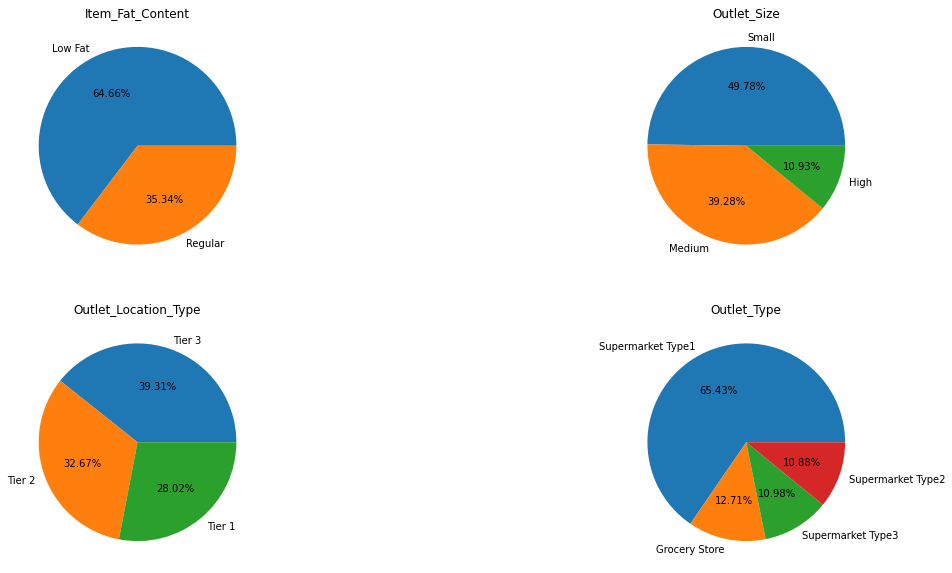

In [61]:
plt.subplots(2,2,figsize=(20,10))

plt.subplot(221)
plt.pie(v1,labels=labels,autopct='%.2f%%')
plt.title('Item_Fat_Content')

plt.subplot(222)
plt.pie(v2,labels=labels1,autopct='%.2f%%')
plt.title('Outlet_Size')

plt.subplot(223)
plt.pie(v3,labels=labels2,autopct='%.2f%%')
plt.title('Outlet_Location_Type')

plt.subplot(224)
plt.pie(v4,labels=labels3,autopct='%.2f%%')
plt.title('Outlet_Type')


plt.show()

## Interpretation:-
      * There are more number of items with 'Low Fat' content with a percentage of 64.66% 
      and 'Regular' items with a percentage of 35.34%.
      * The Outlet_Size with 'Small' is having more percentage 49.78% followed by 
      'Medium Outlet_Size' of percentage 39.28% and 'High Outlet_Size' with 10.93%.
      *There are more number of 'tier-3' Outlet_Location_type with percentage of 39.31%
      followed by 'Tier-2' with 32.67%.
      *There are more number of supermarket_Type1 outlets with a percentage of 65.43%
      followed by 'Grocery store' with 12.71%.

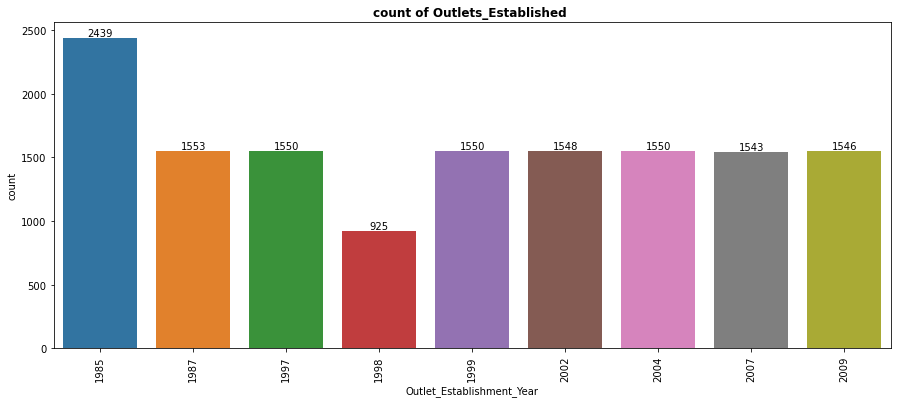

In [62]:
#countplot for number of Outlets Established for given Years
plt.figure(figsize=(15,6))
ax2 = sb.countplot(data = df1, x = 'Outlet_Establishment_Year')
for container in ax2.containers:
    ax2.bar_label(container)

plt.xticks(rotation=90)
plt.title('count of Outlets_Established ',fontweight='bold')
plt.show()

## Interpretation:-
      *The outlets established are more in the year 1985 and least in the year 1998.
      *Other than 1985 and 1998 the outlets established for each year difference between 1-5 outlets.

In [63]:
#Minimum value for Item_Outlet_sales
df1['Item_Outlet_Sales'].min()

-1266.722878861603

In [64]:
#Maximum value for Item_Outlet_sales
df1['Item_Outlet_Sales'].max()

13086.9648

In [65]:
#creating bins using minimum and maximum of Item_outlet_sales
bins = [30,2000,4000,6000,8000,10000,12000,13100]

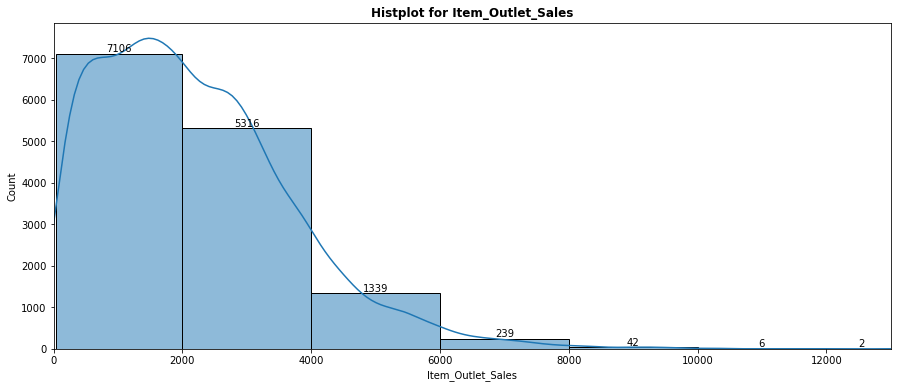

In [66]:
#Histogram plot for outlet sales

plt.figure(figsize=(15,6))

ax4 = sb.histplot(data=df1['Item_Outlet_Sales'],bins=bins,kde=True)
for container in ax4.containers:
    ax4.bar_label(container)

plt.title('Histplot for Item_Outlet_Sales',fontweight='bold')
plt.xlim(0,13000)
plt.show()

In [67]:
q = df1['Item_Outlet_Sales'].quantile(0.9)
m = df1['Item_Outlet_Sales'].mean()

print(f'90% of the data lies before {q}\n')
print(f'Mean of the data lies at {m}\n')

90% of the data lies before 4156.196165818526

Mean of the data lies at 2183.0614977520927



## Interpretation:-
      * 90% of the Item_Outlet_sales liers before 4156.196 and remaining 10% of the sales lies after 4156.196

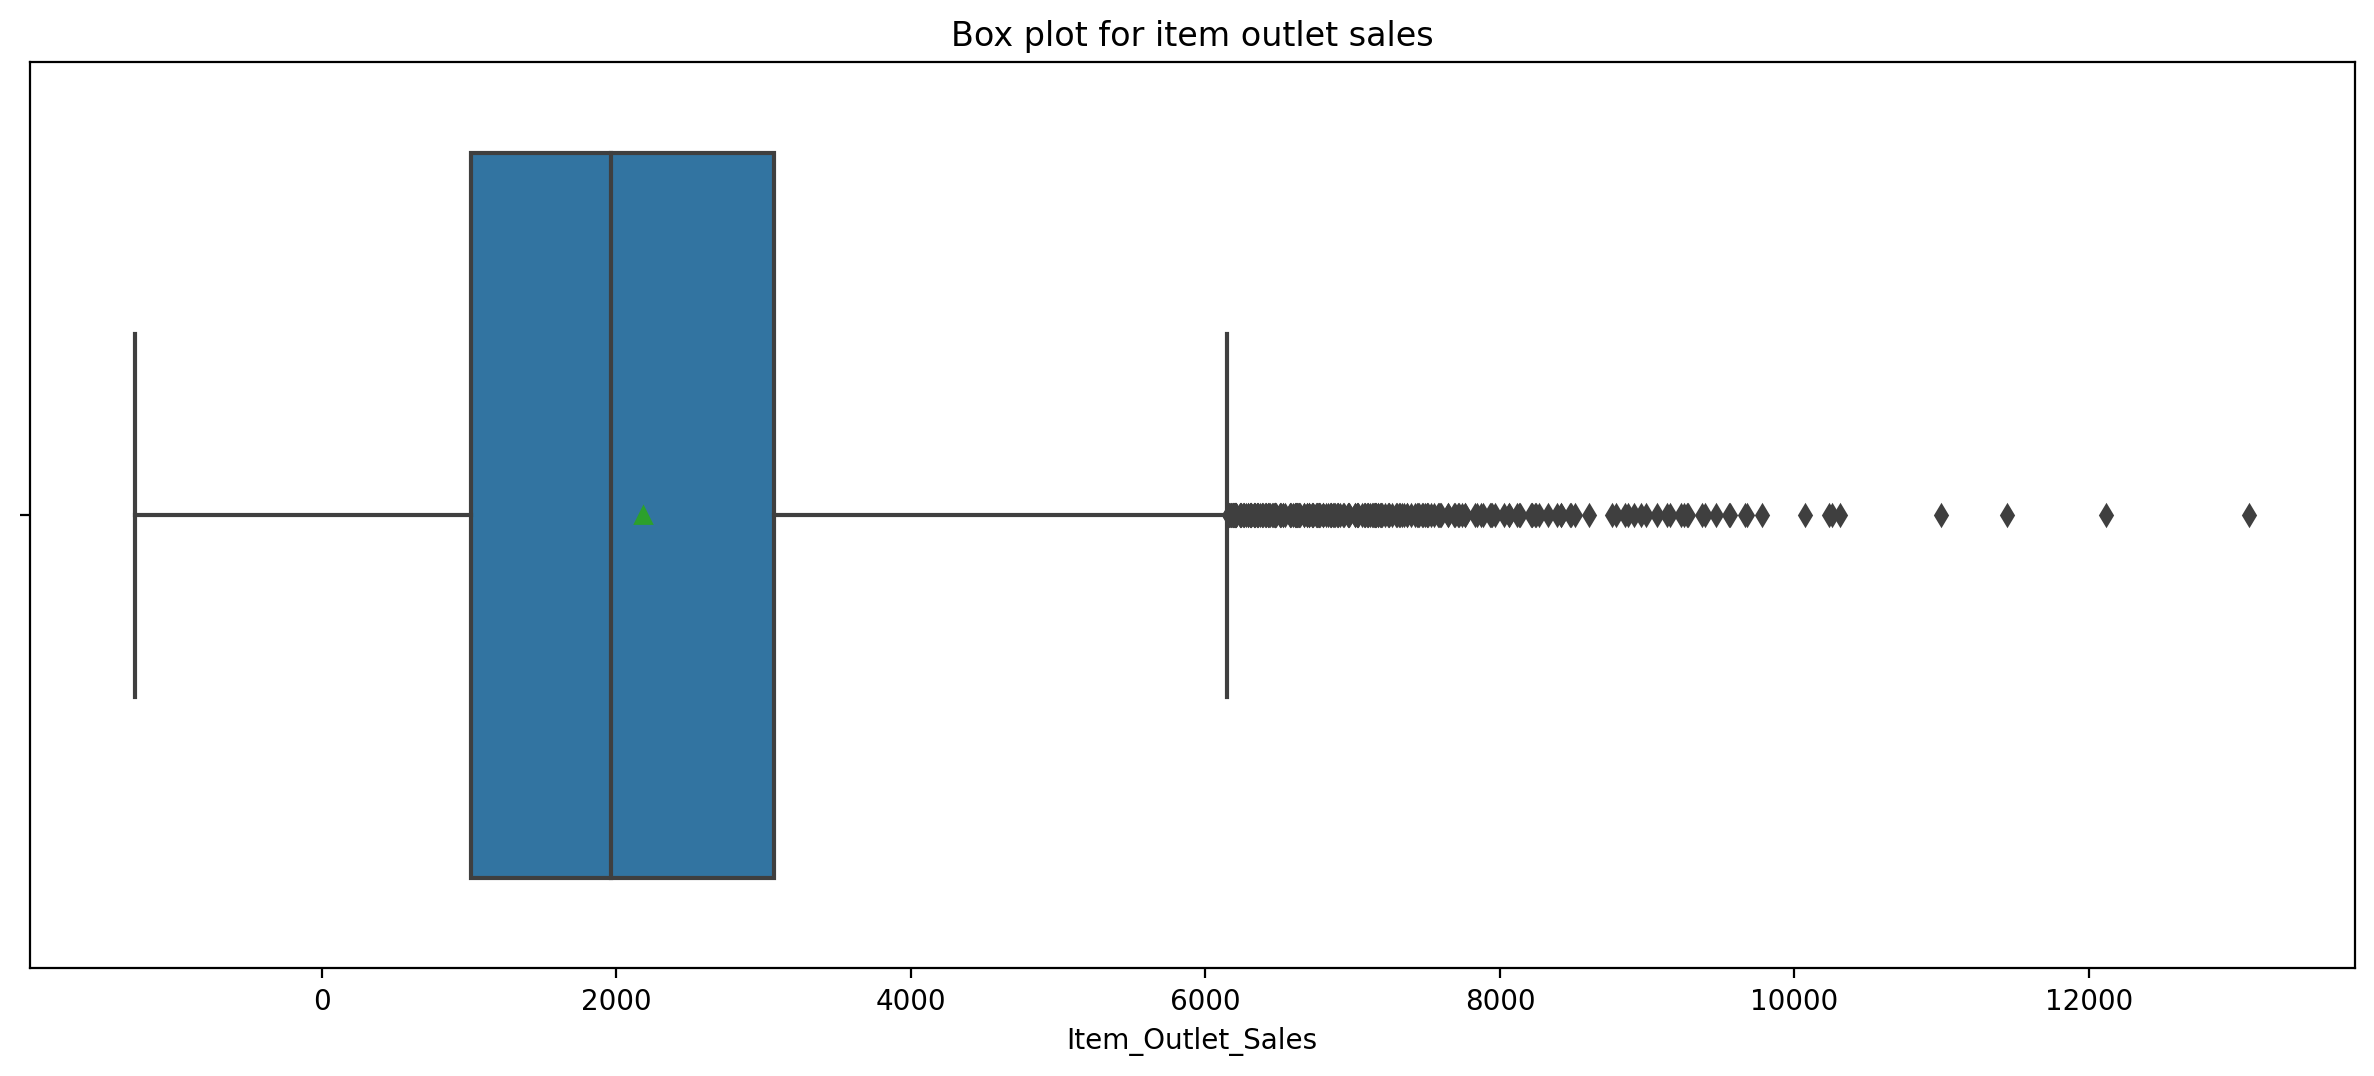

In [68]:
#boxplot for Item_Outlet_Sales
plt.figure(figsize=(15,6),dpi=200)

sb.boxplot(x='Item_Outlet_Sales',data=df1,showmeans=True) # box plot without showing the outliers using showfliers=False attribute
plt.title("Box plot for item outlet sales")
plt.show()

In [69]:
#summary of a feature
df1['Item_Outlet_Sales'].describe()

count    14204.000000
mean      2183.061498
std       1530.642841
min      -1266.722879
25%       1011.947564
50%       1959.671007
75%       3067.340600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [70]:
#finding lower fence and upper fence
lf = 1011.947 - 1.5*(3067.340-1011.947)
uf = 3067.340 + 1.5*(3067.340-1011.947)
print('LF:',lf)
print('UF:',uf)

LF: -2071.1425
UF: 6150.4295


In [71]:
#finding number of outliers
o1 = df1[df1['Item_Outlet_Sales'] < lf]['Item_Outlet_Sales'].count()
print(f'From the IQR technique we found lower fence as {lf} and there are {o1} outliers')

From the IQR technique we found lower fence as -2071.1425 and there are 0 outliers


In [72]:
#finding number of outliers
o2 = df1[df1['Item_Outlet_Sales'] > uf]['Item_Outlet_Sales'].count()
print(f'From the IQR technique we found  upper fence as {uf} and there are {o2} outliers')

From the IQR technique we found  upper fence as 6150.4295 and there are 251 outliers


In [73]:
# Total no of outliers
Total_outliers = o1+o2

print(f'The total number of lower and upper fence outliers are {Total_outliers}')

The total number of lower and upper fence outliers are 251


     * No need of outliers treatment as the outliers are not more than 2%.

In [74]:
#Minimum MRP
df1['Item_MRP'].min()

31.29

In [75]:
#Maximum MRP
df1['Item_MRP'].max()

266.8884

In [76]:
#creating bins for item mrp
b2 = [30,50,100,150,200,250,300]

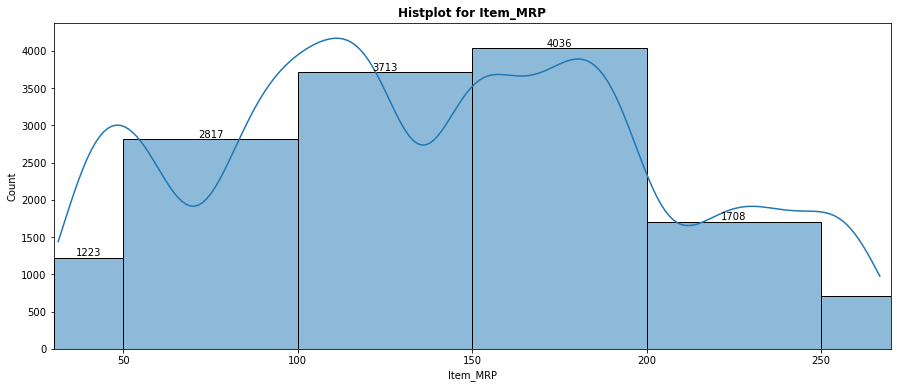

In [77]:
#Histogram plot for Item_MRP

plt.figure(figsize=(15,6))

ax6 = sb.histplot(data=df1['Item_MRP'],bins=b2,kde=True)
for container in ax6.containers:
    ax6.bar_label(container)

plt.title('Histplot for Item_MRP',fontweight='bold')
plt.xlim(30,270)
plt.show()

In [78]:
q2 = df1['Item_MRP'].quantile(0.9)
m2 = df1['Item_MRP'].mean()

print(f'90% of the data lies before {q2}\n')
print(f'Mean of the data lies at {m2}\n')

90% of the data lies before 231.1668

Mean of the data lies at 141.00497725992656



## Interpretation:-
      * 90% of the items have the Item_MRP below the range 231.1668.

### 2.BIVARIATE ANALYSIS

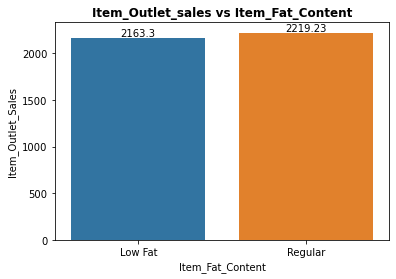

In [79]:
#barplot Item_fat_Content vs Item_Outlet_Sales
ax = sb.barplot(data = df1, y='Item_Outlet_Sales', x = 'Item_Fat_Content',ci=None)
for container in ax.containers:
    ax.bar_label(container)


plt.title('Item_Outlet_sales vs Item_Fat_Content',fontweight='bold')
plt.show()

## Interpretation:-
     * The items with 'Regular'fat content have more sales than the items with 'Low fat' content.

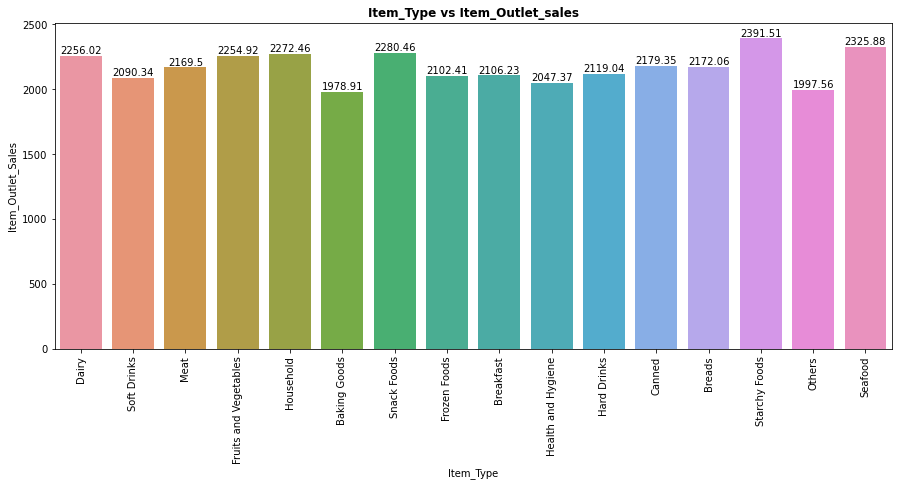

In [80]:
#barplot Item_Type vs Item_Outlet_Sales
plt.figure(figsize=(15,6))
ax1 = sb.barplot(data = df1, y='Item_Outlet_Sales', x = 'Item_Type',ci=None)
for container in ax1.containers:
    ax1.bar_label(container)

plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Outlet_sales',fontweight='bold')
plt.show()

## Interpretation:-
     * The item Types such as 'Starchy foods' and 'Seafood' have more sales than the other item types 
     and least sales in 'Others'.

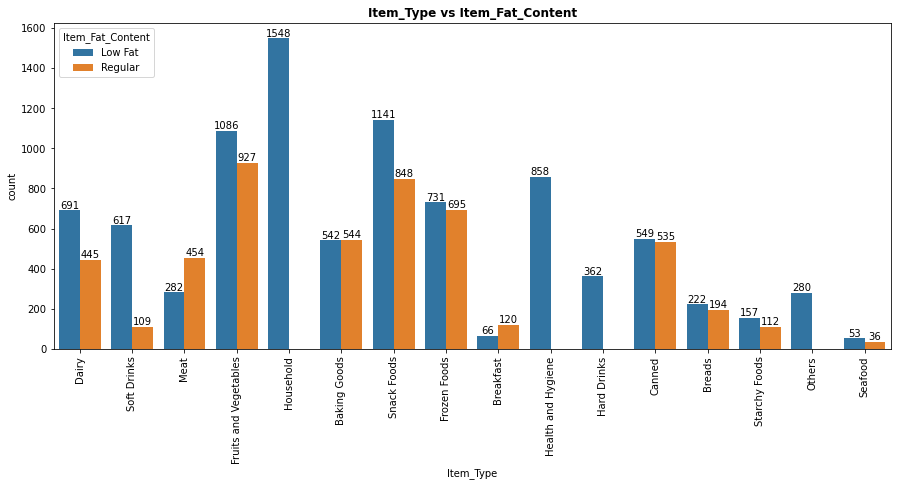

In [81]:
# Plotting for  Item_Fat_Content and item type
plt.figure(figsize=(15,6))

ax3=sb.countplot(data = df1, x='Item_Type', hue = 'Item_Fat_Content')
for container in ax3.containers:
    ax3.bar_label(container)
    
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Fat_Content',fontweight='bold')
plt.show()


## Interpretation:-
      * For the Item_Types like 'Household', 'Health and Hygiene', 'Hard Drinks' and 'Others' we dont have any items  with
      'Regular fat content'.
      * The 'Household' item type have the more number of items with 'Low fat content' followed by 'Snack Foods' 
      and least in 'Seafood'.
      * The 'Fruits and Vegetables' item type have more number of 'Regular' fat content items followed by 'Snack Foods'
      and least in 'Seafood'.
    

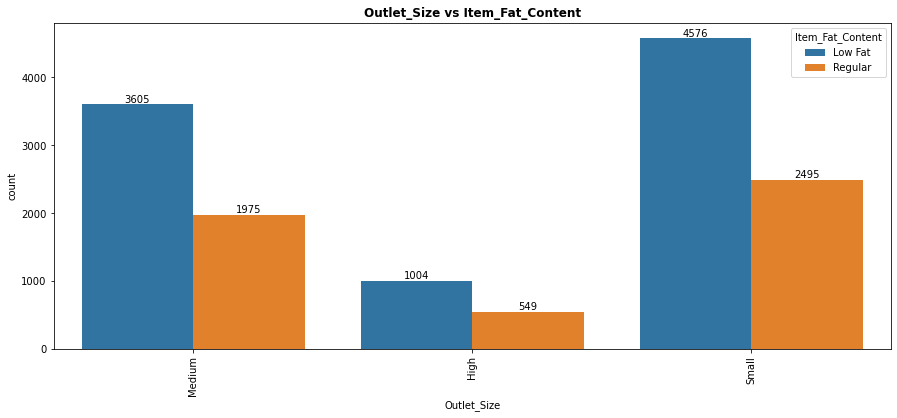

In [82]:
# Plotting for Item_Fat_Content and Outlet_size
plt.figure(figsize=(15,6))

ax5=sb.countplot(data = df1, x='Outlet_Size', hue = 'Item_Fat_Content')
for container in ax5.containers:
    ax5.bar_label(container)
    
plt.xticks(rotation=90)
plt.title('Outlet_Size vs Item_Fat_Content',fontweight='bold')
plt.show()

## Interpretation:-
       *The small,medium and High Outlet sizes have the more number of items with 'Low_Fat_content' compared to 
       'regular Item'.

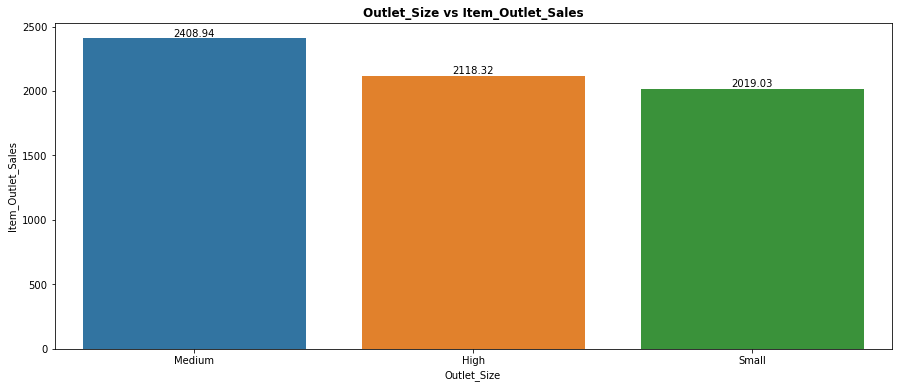

In [83]:
# Plotting for Item_Fat_Content and Outlet_size
plt.figure(figsize=(15,6))

ax6=sb.barplot(data = df1, x='Outlet_Size', y = 'Item_Outlet_Sales',ci=None)
for container in ax6.containers:
    ax6.bar_label(container)
    

plt.title('Outlet_Size vs Item_Outlet_Sales',fontweight='bold')
plt.show()

## Interpretation:-
        * The Outlet sales are mostly for the Outlets of medium size followed by outlets with high size and lastly 
        small size outlets.

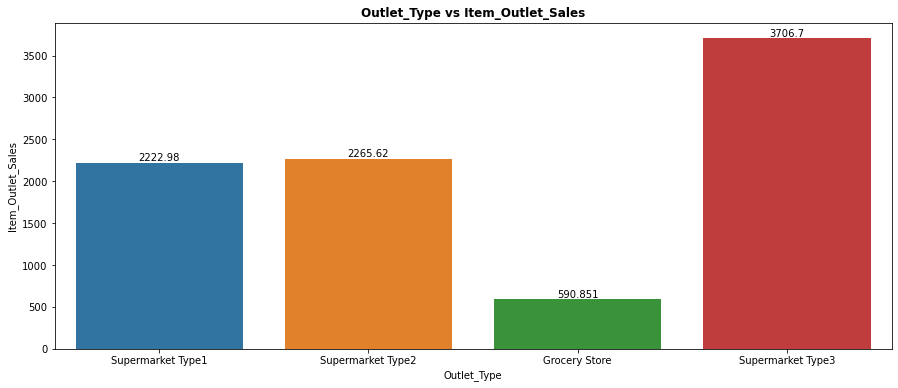

In [84]:
# Plotting for Item_Fat_Content and Outlet_size
plt.figure(figsize=(15,6))

ax6=sb.barplot(data = df1, x='Outlet_Type', y = 'Item_Outlet_Sales',ci=None)
for container in ax6.containers:
    ax6.bar_label(container)
    

plt.title('Outlet_Type vs Item_Outlet_Sales',fontweight='bold')
plt.show()

## Interpretation:-
        * The Outlet sales are mostly for the Outlet types of Supermarket Type3 and least in the Grocery store.

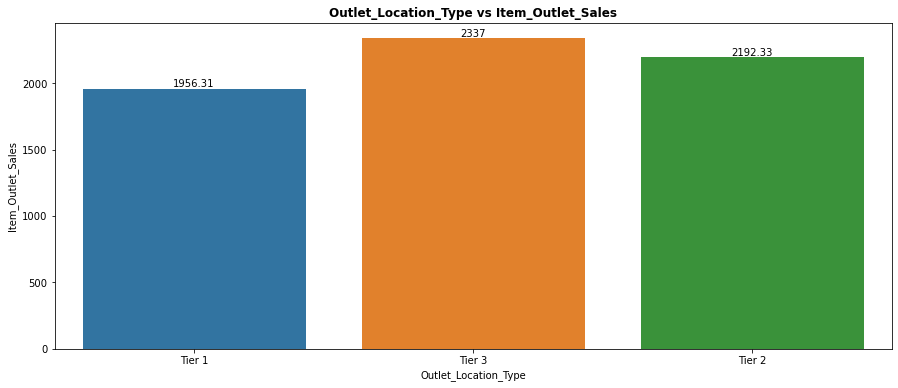

In [85]:
# Plotting for Item_Fat_Content and Outlet_size
plt.figure(figsize=(15,6))

ax6=sb.barplot(data = df1, x='Outlet_Location_Type', y = 'Item_Outlet_Sales',ci=None)
for container in ax6.containers:
    ax6.bar_label(container)
    

plt.title('Outlet_Location_Type vs Item_Outlet_Sales',fontweight='bold')
plt.show()

## Interpretation:-
        * The Outlet sales are mostly for outlets in  Tier-3 Location and least in Tier-1 Locations.

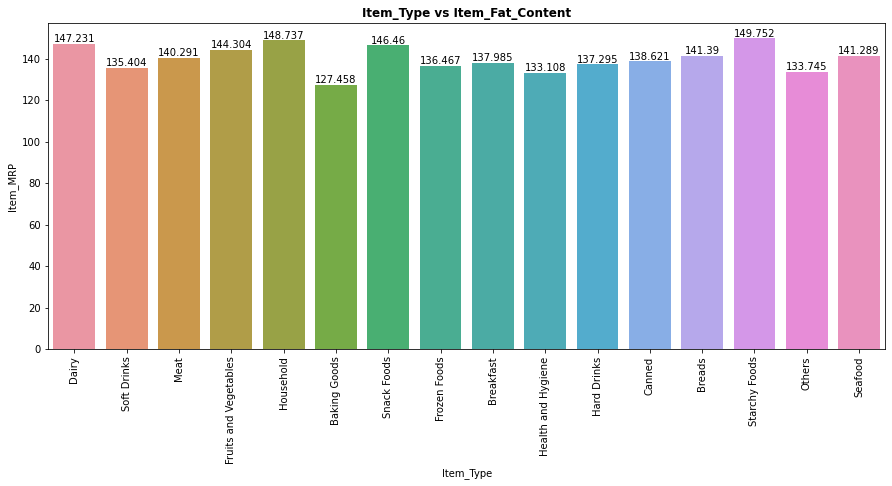

In [86]:
# Plotting for  item type and Item_MRP
plt.figure(figsize=(15,6))

ax7=sb.barplot(x=df1['Item_Type'], y = df1['Item_MRP'],ci=None)
for container in ax7.containers:
    ax7.bar_label(container)
    
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Fat_Content',fontweight='bold')
plt.show()


## Interpretation:-
     * The 'Starchy Foods' items have more Item_MRP compared to other items followed by 'Hosue Hold' items.

# Multivariate Analysis

In [87]:
v1 = df1[(df1['Outlet_Size'] == 'Small') & (df1['Item_Fat_Content'] == 'Low Fat')]
v1.shape

(4576, 12)

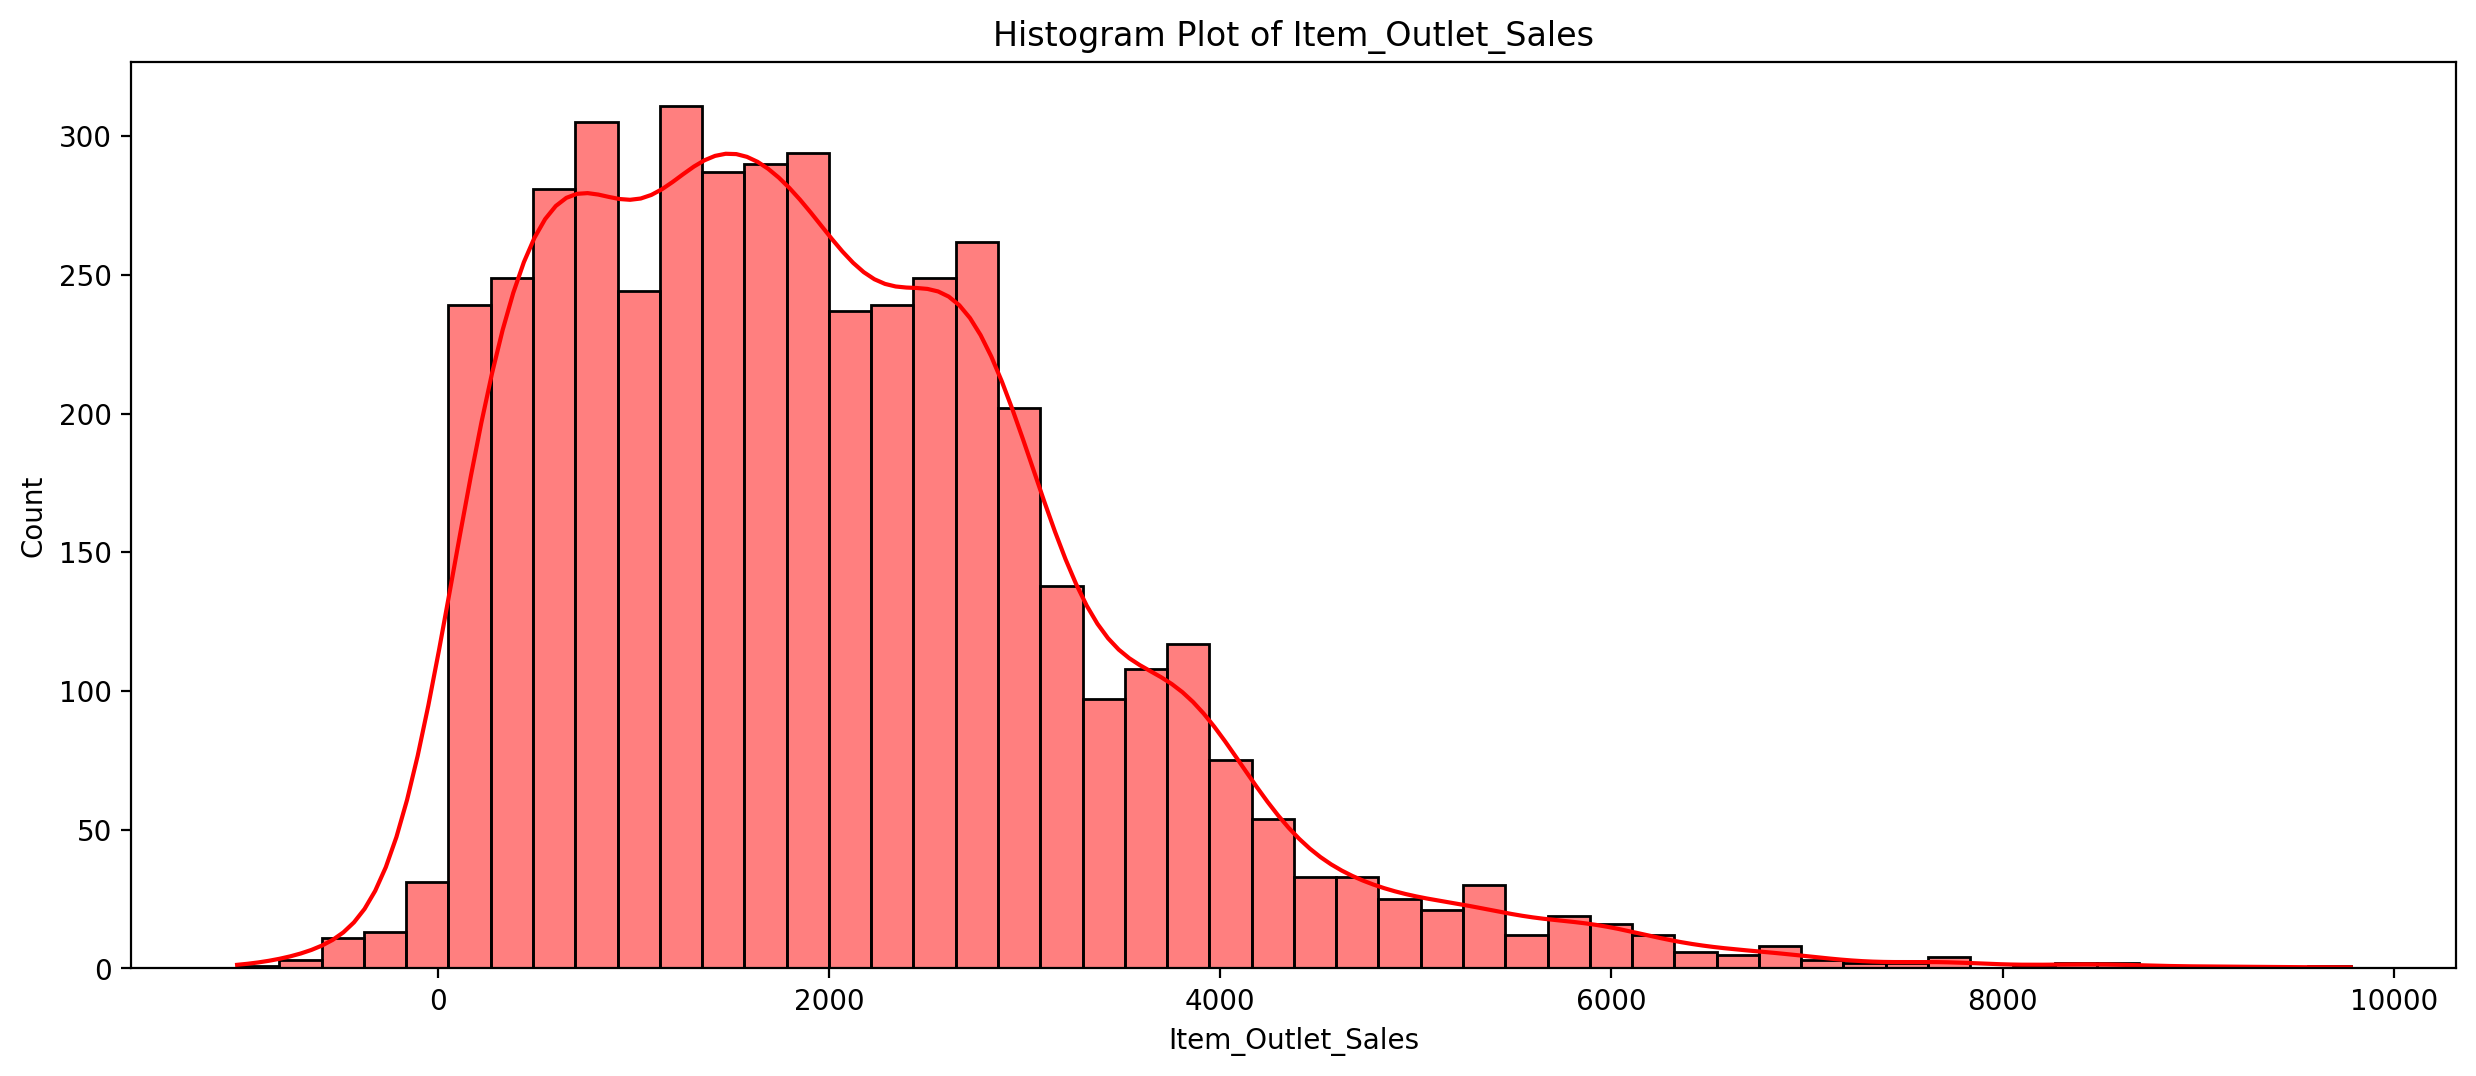

In [88]:
plt.figure(figsize=(15,6),dpi=200)

plt.title('Histogram Plot of Item_Outlet_Sales')
sb.histplot(x=v1['Item_Outlet_Sales'],kde=True,color='red')

plt.show()

In [89]:
q1 = v1['Item_Outlet_Sales'].quantile(0.9)
m1 = v1['Item_Outlet_Sales'].mean()

print(f'90% of the data lies before {q1}\n')
print(f'Mean of the data lies at {m1}\n')

90% of the data lies before 3771.4111418034936

Mean of the data lies at 1988.3359788529738



## Interpretation:-
       * For the 'Small Outlet_Size' with items with 'Low Fat Content' have the 90% of Outlet_Sales below 
       the range 3771.411.

In [90]:
v2 = df1[(df1['Outlet_Size'] == 'Medium') & (df1['Item_Fat_Content'] == 'Regular')]
v2.shape

(1975, 12)

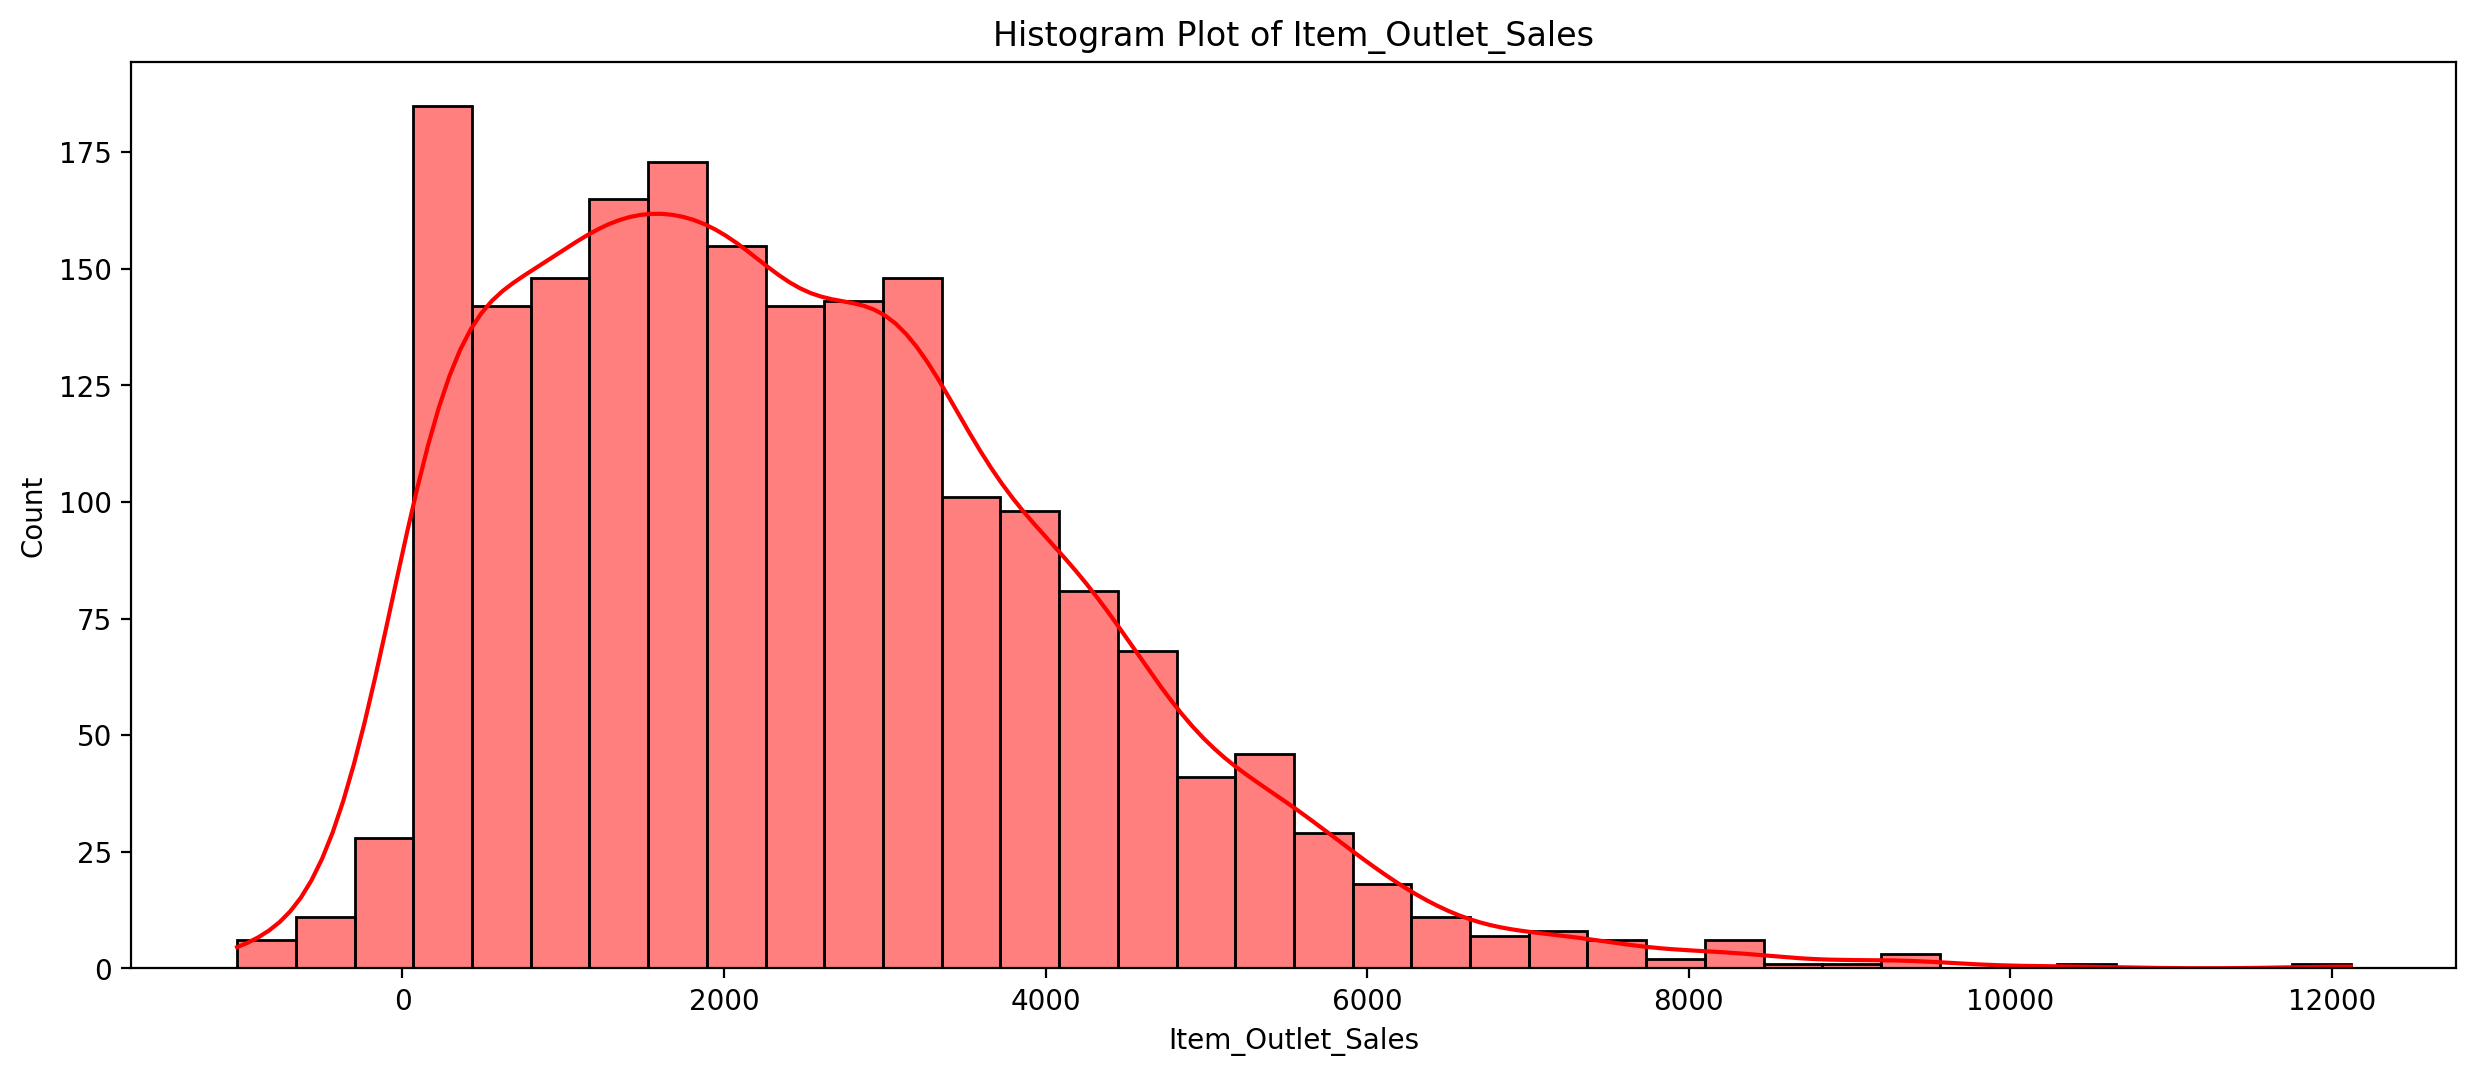

In [91]:
plt.figure(figsize=(15,6),dpi=200)

plt.title('Histogram Plot of Item_Outlet_Sales')
sb.histplot(x=v2['Item_Outlet_Sales'],kde=True,color='red')

plt.show()

In [92]:
q2 = v2['Item_Outlet_Sales'].quantile(0.9)
m2 = v2['Item_Outlet_Sales'].mean()

print(f'90% of the data lies before {q2}\n')
print(f'Mean of the data lies at {m2}\n')

90% of the data lies before 4671.5654158063535

Mean of the data lies at 2428.1215488276025



## Interpretation:-
       * For the 'Medium Outlet_Size' with items with 'regular Fat Content' have the 90% of Outlet_Sales below 
       the range 4671.56.

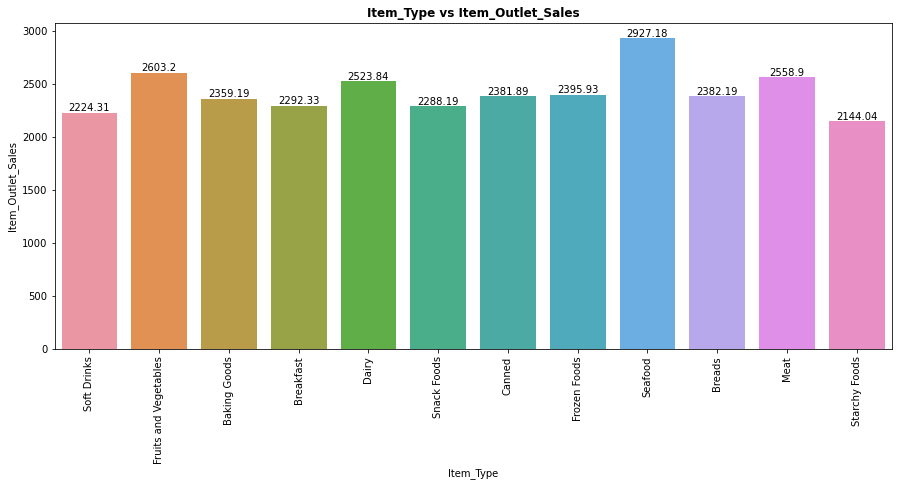

In [93]:
# Plotting for  item type and Item_MRP
plt.figure(figsize=(15,6))

ax8=sb.barplot(x=v2['Item_Type'], y = v2['Item_Outlet_Sales'],ci=None)
for container in ax8.containers:
    ax8.bar_label(container)
    
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Outlet_Sales',fontweight='bold')
plt.show()


## Interpretation:-
       *For the 'Medium Outlet_Size' and items with 'regular Fat Content' the outlet sales are more in for the 
       Items 'Seafood','Fruits and vegetables','Meat' and 'Dairy'.

# Data preprocessing 

In [94]:
#checking for info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [95]:
#non numeric columns in a list
non_numeric_cols1 = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type'
                    ,'Outlet_Type']

In [96]:
#converting the non_numeric_cols to category cols

for m in non_numeric_cols1:
    df1[m] = df1[m].astype('category')

In [97]:
#checking for info after converting into category cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  category
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  category
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  category
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  category
 7   Outlet_Establishment_Year  14204 non-null  int64   
 8   Outlet_Size                14204 non-null  category
 9   Outlet_Location_Type       14204 non-null  category
 10  Outlet_Type                14204 non-null  category
 11  Item_Outlet_Sales          14204 non-null  float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 822.9 KB


In [98]:
#category columns in a list
category_cols1 = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type'
                    ,'Outlet_Type']

In [99]:
for n in category_cols1:
    df1[n] = label_encoder.fit_transform(df1[n])

In [100]:
#checking for info after converting into numerical cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  category
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  int32   
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  int32   
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  int32   
 7   Outlet_Establishment_Year  14204 non-null  int64   
 8   Outlet_Size                14204 non-null  int32   
 9   Outlet_Location_Type       14204 non-null  int32   
 10  Outlet_Type                14204 non-null  int32   
 11  Item_Outlet_Sales          14204 non-null  float64 
dtypes: category(1), float64(4), int32(6), int64(1)
memory usage: 1.0 MB


In [101]:
#dropping the unnecessary column
df1.drop(['Item_Identifier'],axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.380000
4,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2474.281707
14200,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,3038.826129
14201,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,1713.574002
14202,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,3046.314844


In [102]:
#scaling the data using standard scaler
#perform scaling for null values dataset without dependent column using standardisation
scaler = StandardScaler()
numerics = ['int16','int32','int64','float16','float32','float64']
df1_new = df1.select_dtypes(include=numerics)
df1_scaled = pd.DataFrame(scaler.fit_transform(df1_new.to_numpy()),columns=df1_new.columns)
df1_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.751014,-0.739212,-1.115880,-0.766467,1.752511,1.507764,0.139681,-0.575144,-1.369286,-0.252702,1.014039
1,-1.477653,1.352792,-1.049426,1.606957,-1.493696,-0.607145,1.334228,-0.575144,1.091566,1.002766,-1.136581
2,1.011839,-0.739212,-1.101219,0.657587,0.009874,1.507764,0.139681,-0.575144,-1.369286,-0.252702,-0.056051
3,1.377308,1.352792,0.084363,-0.291782,0.661838,-1.664600,0.020226,-0.575144,1.091566,-1.508171,-0.947793
4,-0.830557,-0.739212,-0.123442,0.420245,-1.403623,-1.312115,-1.293777,-2.055636,1.091566,-0.252702,-0.776405
...,...,...,...,...,...,...,...,...,...,...,...
14199,-0.493036,1.352792,-1.168345,1.369614,0.005000,1.155279,-0.099229,0.905347,-1.369286,-0.252702,0.190267
14200,-1.116483,1.352792,1.495082,1.844299,0.453249,-0.607145,1.334228,-0.575144,1.091566,1.002766,0.559108
14201,-0.600527,-0.739212,0.066388,0.182903,-0.358558,0.802794,0.498045,0.905347,-0.138860,-0.252702,-0.306736
14202,0.538878,1.352792,-0.115015,-1.003809,1.185747,-0.959630,1.095319,0.905347,-0.138860,-0.252702,0.564001


In [103]:
va = df1_scaled.corr()
va

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.020963
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.017470
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.154614
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.028709
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.636500
Outlet_Identifier,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.178167
Outlet_Establishment_Year,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.058883
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.072137
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.099716
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,0.099899,-0.122519,-0.260496,0.467251,1.000000,0.447677


In [104]:
va['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.636500
Outlet_Type                  0.447677
Outlet_Identifier            0.178167
Outlet_Location_Type         0.099716
Item_Type                    0.028709
Item_Weight                  0.020963
Item_Fat_Content             0.017470
Outlet_Establishment_Year   -0.058883
Outlet_Size                 -0.072137
Item_Visibility             -0.154614
Name: Item_Outlet_Sales, dtype: float64

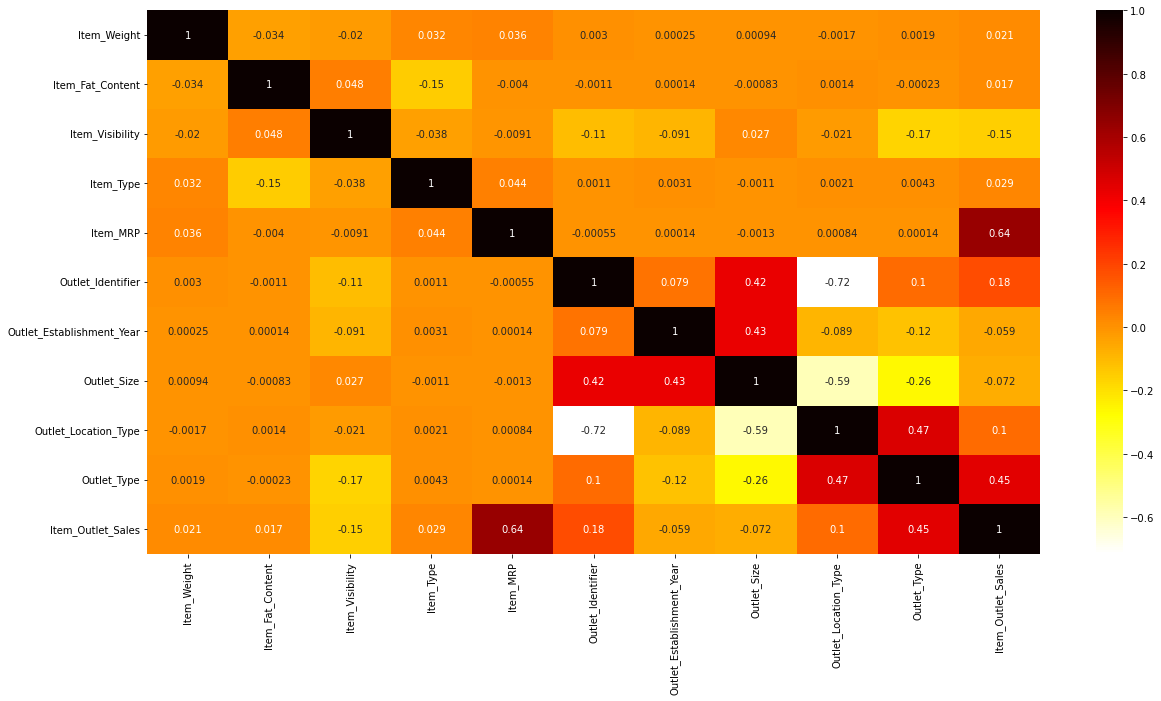

In [105]:
#Plotting the heatmap
plt.figure(figsize=(20,10))
sb.heatmap(va,annot=True,cmap='hot_r')
plt.show()

In [106]:
# Feature selection based on correlation
df1_1 = df1_scaled.drop(['Outlet_Establishment_Year','Item_Fat_Content','Item_Weight','Item_Type'],axis=1)
df1_1.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.115880,1.752511,1.507764,-0.575144,-1.369286,-0.252702,1.014039
1,-1.049426,-1.493696,-0.607145,-0.575144,1.091566,1.002766,-1.136581
2,-1.101219,0.009874,1.507764,-0.575144,-1.369286,-0.252702,-0.056051
3,0.084363,0.661838,-1.664600,-0.575144,1.091566,-1.508171,-0.947793
4,-0.123442,-1.403623,-1.312115,-2.055636,1.091566,-0.252702,-0.776405


In [107]:
#'Outlet_Size','Item_Visibility'
#'Item_Fat_Content','Item_Weight','Item_Type'

In [108]:
#specifying x and y
X1 = df1_1.loc[:, df1_1.columns != 'Item_Outlet_Sales']
y1 = df1_1['Item_Outlet_Sales']

In [109]:
#specifying x and y
X = df1_scaled.loc[:, df1_scaled.columns != 'Item_Outlet_Sales']
y = df1_scaled['Item_Outlet_Sales']

In [110]:
#importing required libraries for model building
from sklearn.model_selection import cross_val_score,KFold
from numpy import mean,std

## 1.RandomForestRegressor

In [111]:
#import random forest library
from sklearn.ensemble import RandomForestRegressor

In [112]:
# Define model
model1 = RandomForestRegressor(max_depth=10,min_samples_split=12,max_leaf_nodes=24)

In [113]:
#evaluate the model
cv = KFold(n_splits=15,shuffle=False,random_state = None)
score1_r2 = cross_val_score(model1,X,y,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
score1_mse = cross_val_score(model1,X,y,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1,error_score='raise')
score1_rmse = cross_val_score(model1,X,y,cv=cv,scoring='neg_root_mean_squared_error',n_jobs=-1,error_score='raise')
score1_mae = cross_val_score(model1,X,y,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')

In [114]:
#Report performance
print('R2 : %.3f  (%.3f)' %(mean(score1_r2),std(score1_r2)))
print('mean squared error : %.3f  (%.3f)' %(mean(score1_mse),std(score1_mse)))
print('Root mean squared error : %.3f  (%.3f)' %(mean(score1_rmse),std(score1_rmse)))
print('mean absolute error : %.3f  (%.3f)' %(mean(score1_mae),std(score1_mae)))

R2 : 0.706  (0.148)
mean squared error : -0.338  (0.217)
Root mean squared error : -0.538  (0.220)
mean absolute error : -0.393  (0.150)


## Interpretation:-
       * After checking the performance of all the algorithms using cross validation technique it is found that the 
       'RandomForestRegression' algorithm model gives the best Performance.
       * The coefficient of determination(r-square) of RandomForestRegression model is 70.6%.
       * The performance of the Model is 'Good'.

# Model performance check using different algorithmns.

## 2.LinearRegression

In [115]:
#Define the model
model2 = LinearRegression()

In [116]:
#evaluate the model
cv = KFold(n_splits=15,shuffle=False,random_state = None)
score_r2 = cross_val_score(model2,X1,y1,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
score_mse = cross_val_score(model2,X1,y1,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1,error_score='raise')
score_rmse = cross_val_score(model2,X1,y1,cv=cv,scoring='neg_root_mean_squared_error',n_jobs=-1,error_score='raise')
score_mae = cross_val_score(model2,X1,y1,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')

In [117]:
#Report performance
print('R2 : %.3f  (%.3f)' %(mean(score_r2),std(score_r2)))
print('mean squared error : %.3f  (%.3f)' %(mean(score_mse),std(score_mse)))
print('Root mean squared error : %.3f  (%.3f)' %(mean(score_rmse),std(score_rmse)))
print('mean absolute error : %.3f  (%.3f)' %(mean(score_mae),std(score_mae)))

R2 : 0.700  (0.244)
mean squared error : -0.372  (0.303)
Root mean squared error : -0.486  (0.368)
mean absolute error : -0.367  (0.276)


In [118]:
#fitting the train data
model2.fit(X_train,Y_train)

LinearRegression()

In [119]:
#checking for performance of train data
r_sq1_1 = model2.score(X_train,Y_train)
r_sq1_1

0.49941425125992545

In [120]:
#checking for performance of test data
r_sq2_1 = model2.score(X_test,Y_test)
r_sq2_1

0.5075998381067862

## 3.DecisionTreeRegressor

In [121]:
#import random forest library
from sklearn.tree import DecisionTreeRegressor

In [122]:
model3 = DecisionTreeRegressor(max_depth=10,min_samples_split=12,max_leaf_nodes=24)

In [123]:
#evaluate the model
cv = KFold(n_splits=15,shuffle=False,random_state = None)
score3_r2 = cross_val_score(model3,X,y,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
score3_mse = cross_val_score(model3,X,y,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1,error_score='raise')
score3_rmse = cross_val_score(model3,X,y,cv=cv,scoring='neg_root_mean_squared_error',n_jobs=-1,error_score='raise')
score3_mae = cross_val_score(model3,X,y,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')

In [124]:
#Report performance
print('R2 : %.3f  (%.3f)' %(mean(score3_r2),std(score3_r2)))
print('mean squared error : %.3f  (%.3f)' %(mean(score3_mse),std(score3_mse)))
print('Root mean squared error : %.3f  (%.3f)' %(mean(score3_rmse),std(score3_rmse)))
print('mean absolute error : %.3f  (%.3f)' %(mean(score3_mae),std(score3_mae)))

R2 : 0.699  (0.145)
mean squared error : -0.343  (0.216)
Root mean squared error : -0.545  (0.216)
mean absolute error : -0.397  (0.149)


## 4.XGB Regressor

In [125]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


# All requested packages already installed.

Retrieving notices: ...working... done


In [126]:
!pip install xgboost

In [127]:
conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [128]:
from xgboost import XGBRegressor

In [129]:
#fit the model on training data
model4 = XGBRegressor(n_estimators=25,max_depth=3,ets=0.1,subsample=0.7,colsample_bytree=0.8)

In [130]:
#evaluate the model
cv = KFold(n_splits=15,shuffle=False,random_state = None)
score4_r2 = cross_val_score(model4,X,y,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
score4_mse = cross_val_score(model4,X,y,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1,error_score='raise')
score4_rmse = cross_val_score(model4,X,y,cv=cv,scoring='neg_root_mean_squared_error',n_jobs=-1,error_score='raise')
score4_mae = cross_val_score(model4,X,y,cv=cv,scoring='neg_mean_absolute_error',n_jobs=-1,error_score='raise')

In [131]:
#Report performance
print('R2 : %.3f  (%.3f)' %(mean(score4_r2),std(score4_r2)))
print('mean squared error : %.3f  (%.3f)' %(mean(score4_mse),std(score4_mse)))
print('Root mean squared error : %.3f  (%.3f)' %(mean(score4_rmse),std(score4_rmse)))
print('mean absolute error : %.3f  (%.3f)' %(mean(score4_mae),std(score4_mae)))

R2 : 0.711  (0.162)
mean squared error : -0.337  (0.229)
Root mean squared error : -0.530  (0.237)
mean absolute error : -0.388  (0.165)


In [132]:
v1=pd.DataFrame({'models':['LinearRegression','DecisionTreeregressor','RandomForestregressor','XGB Regressor'],
                 'R2(r-sq)':[70,70,70.7,71.1],
                 'MSE':[-0.372,-0.343,-0.338,-0.337],
                 'RMSE':[-0.486,-0.545,-0.538,-0.530],
                 'MAE':[-0.367,-0.397,-0.392,-0.388]})
v1

,models,R2(r-sq),MSE,RMSE,MAE
0,LinearRegression,70.0,-0.372,-0.486,-0.367
1,DecisionTreeregressor,70.0,-0.343,-0.545,-0.397
2,RandomForestregressor,70.7,-0.338,-0.538,-0.392
3,XGB Regressor,71.1,-0.337,-0.530,-0.388


## Final Interpretation:-
        * The XGBregressor performance is better compared to other algorithm models.

In [133]:
#splitting the data using hold out method
train,test = train_test_split(df1_scaled,test_size=0.3,random_state=42)

In [134]:
X_train = train.drop(['Item_Outlet_Sales'],axis=1)
Y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Outlet_Sales'],axis=1)
Y_test = test['Item_Outlet_Sales']

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((9942, 10), (4262, 10), (9942,), (4262,))

In [148]:
#fitting the train data
eval_set = [(X_test,Y_test)]
model4.fit(X_train,Y_train,early_stopping_rounds=10,eval_metric='logloss', eval_set=eval_set, verbose=True)

[22:44:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ets" } are not used.

[0]	validation_0-logloss:-2.12561
[1]	validation_0-logloss:-11.48346
[2]	validation_0-logloss:-13.10194
[3]	validation_0-logloss:-13.35986
[4]	validation_0-logloss:-13.84246
[5]	validation_0-logloss:-14.04189
[6]	validation_0-logloss:-14.27747
[7]	validation_0-logloss:-14.20260
[8]	validation_0-logloss:-14.34405
[9]	validation_0-logloss:-14.51766
[10]	validation_0-logloss:-14.53020
[11]	validation_0-logloss:-14.52425
[12]	validation_0-logloss:-14.52238
[13]	validation_0-logloss:-14.53722
[14]	validation_0-logloss:-14.53241
[15]	validation_0-logloss:-14.53912
[16]	validation_0-logloss:-14.55129
[17]	validation_0-logloss:-14.54731
[18]	validation_0-logloss:-14.53975
[19]	validation_0-logloss:-14.53192
[20]	validation_0-logloss:-14.54040
[21]	validation_0-logloss:-14.55621
[22]	validation_0-logloss:

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, ets=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [149]:
#checking for performance of train data
r_sq1 = model4.score(X_train,Y_train)
r_sq1

0.6818715701991773

In [150]:
#checking for performance of test data
r_sq2 = model4.score(X_test,Y_test)
r_sq2

0.6686954571134445

## Interpretation:-
       * The performance of the train data is 68.1%.
       * The Performance of the test data is 66.8%.
       * For both the train and test data the performance is nearly same and the model performance we can say is 'good'.

In [151]:
#predicting the values
y_predict = model4.predict(X_test)
y_predict

array([ 0.6343566 ,  0.70438707,  0.5773434 , ..., -0.71621555,
       -0.29842907, -0.18568034], dtype=float32)

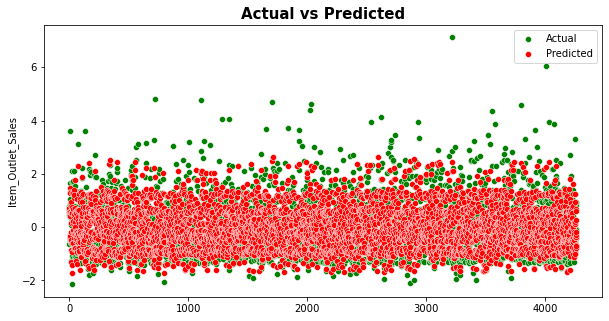

In [152]:
#plotting the graph for actual vs predicted values
x=np.arange(0,len(Y_test))
plt.figure(figsize=(10,5))

sb.scatterplot(x,Y_test,color='green',label='Actual')
sb.scatterplot(x,y_predict,color='red',label='Predicted')
plt.legend(loc='best')
plt.title('Actual vs Predicted',fontweight='bold',size=15)
plt.show()

## Interpretation:-
       * The actual values and predicted values difference is very less.

## checking for most important feature in XGBOOST

In [140]:
from xgboost import plot_importance

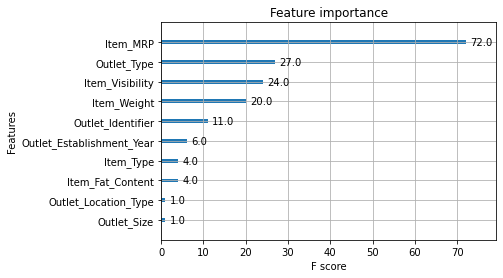

In [141]:
plot_importance(model4)
plt.show()

       * The best feature for the XGBOOST Regressor model is 'Item_MRP' followed by 'Outlet_Type' and 'Item_Visibility'.

In [142]:
df1_pred = pd.concat([X_test,Y_test],axis=1)
df1_pred.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14090,-0.245806,1.352792,-1.22245,0.657587,-0.475972,0.097824,-1.532686,-0.575144,1.091566,2.258235,0.809503


In [143]:
df1_predicteds = df1_pred.copy()

In [144]:
df1_predicteds['predicted sales'] = y_predict

In [145]:
df1_predicteds.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,predicted sales
14090,-0.245806,1.352792,-1.22245,0.657587,-0.475972,0.097824,-1.532686,-0.575144,1.091566,2.258235,0.809503,0.634357


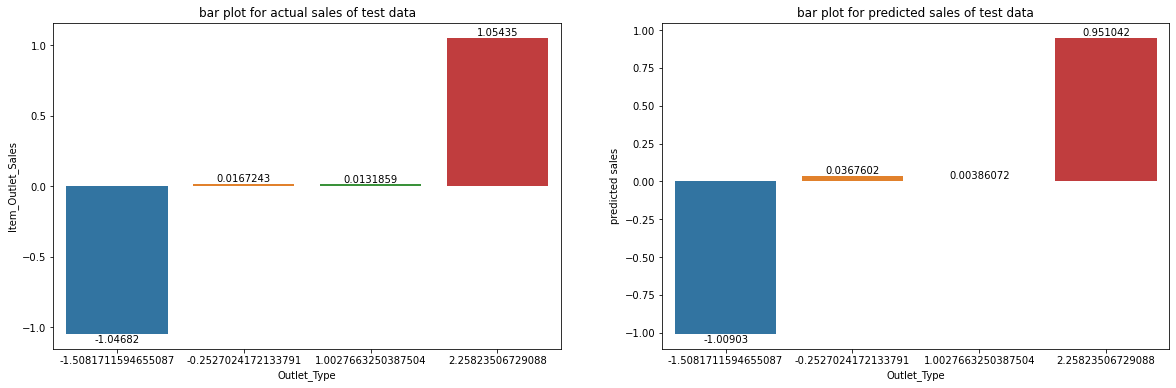

In [146]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(121)
ax6=sb.barplot(data = df1_pred, x='Outlet_Type', y = 'Item_Outlet_Sales',ci=None)
for container in ax6.containers:
    ax6.bar_label(container)
plt.title('bar plot for actual sales of test data')
    
plt.subplot(122)
ax7=sb.barplot(data = df1_predicteds, x='Outlet_Type', y = 'predicted sales',ci=None)
for container in ax7.containers:
    ax7.bar_label(container)
plt.title('bar plot for predicted sales of test data')
    
plt.show()